# Training Models Exercises

### Linear Regression Model

##### The normal equation 
Generating some linear-looking data 

In [21]:
import numpy as np 

In [22]:
X = 2 * np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

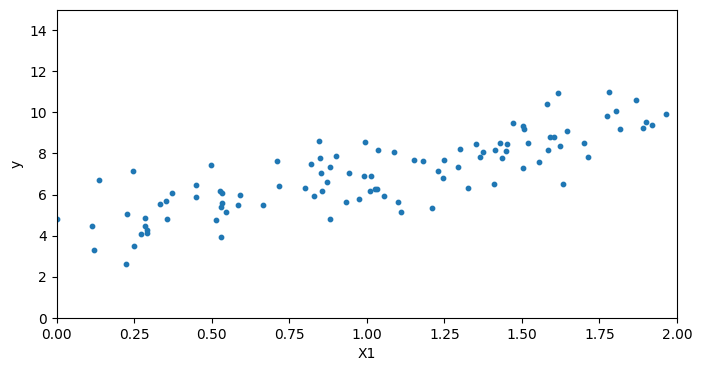

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.show()

Now let's compute the Normal Equation

In [24]:
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance

# linalg.inv - inverse matrix
# dot - matrix multiplication
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [25]:
theta_best

array([[4.11690597],
       [2.83824416]])

Noise made it impossible to recover the exact parameters (4 and 3) of the original function.
Now we can make predictions using this theta.

In [26]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11690597],
       [9.79339429]])

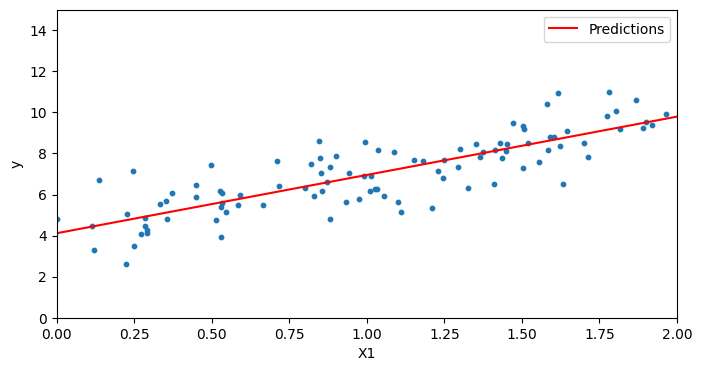

In [27]:
plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, "r-", label='Predictions')
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

Performing linear regression using scikit learn

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11690597]), array([[2.83824416]]))

In [29]:
lin_reg.predict(X_new)

array([[4.11690597],
       [9.79339429]])

#### Batch Gradient Descent
Using full set

In [30]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 # number of instances

# random initialization
theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients

theta

array([[4.11690597],
       [2.83824416]])

#### Stochastic Gradient Descent
Using a randomly picked entity of set in each iteration
Using a simple learning scheduling - gradually reducing the learning rate.

In [31]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    
theta

array([[4.09045903],
       [2.83941724]])

Using sklearn SGD Regressor

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05731684]), array([2.83435791]))

#### Mini-batch Gradient Descent
Using a small set of randomly picked entities in each iteration

### Polynomial Regression

Generating non linear data based on simple quadratic equation

In [85]:
m = 100
X = 6 * np.random.rand(m, 1) - 3 # values from -3 to 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

(-3.0, 3.0, 0.0, 10.0)

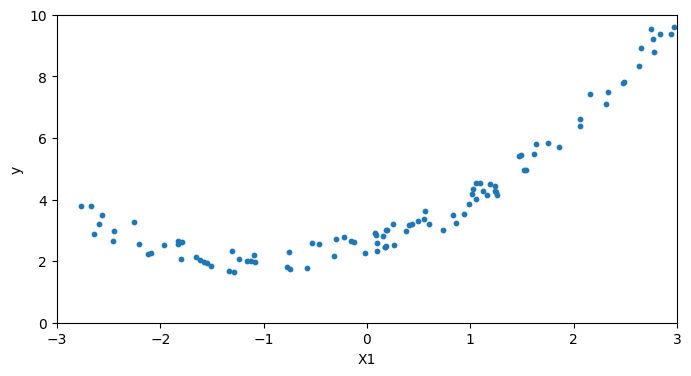

In [86]:
plt.figure(figsize=(8,4))
plt.scatter(X, y, s=10)
plt.xlabel("X1")
plt.ylabel('y')
plt.axis([-3, 3, 0, 10])

<i>PolynomialFeatures</i> adds the square (or more powers) of each feature in the training set as a new feature. In this case there is just one feature.

<b>Important Note:</b> When there are multiple features, Polynomial Regression is capable of finding relationships between features.For  example,  if  there  were two  features  a  and  b,  <i>PolynomialFeatures</i> with  degree=3  would  not  only  add  thefeatures a^2, a^3, b^2, and b^3, but also the combinations ab, a^2b, and ab^2

In [87]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[1.85839488]
[1.85839488 3.45363155]


Now we can fit a <i>LinearRegression</i> model to this extended training data

In [88]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.53575378]), array([[0.99146934, 0.48330382]]))

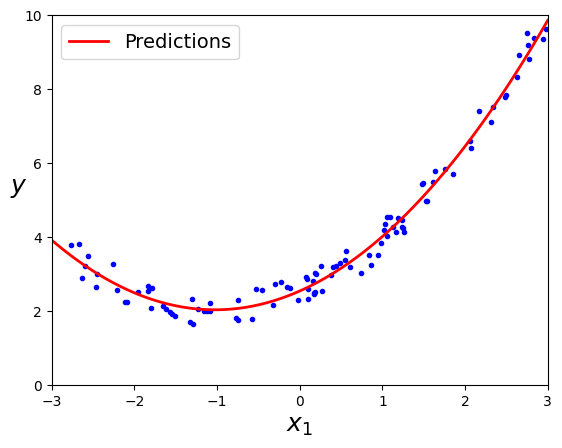

In [89]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 5])    

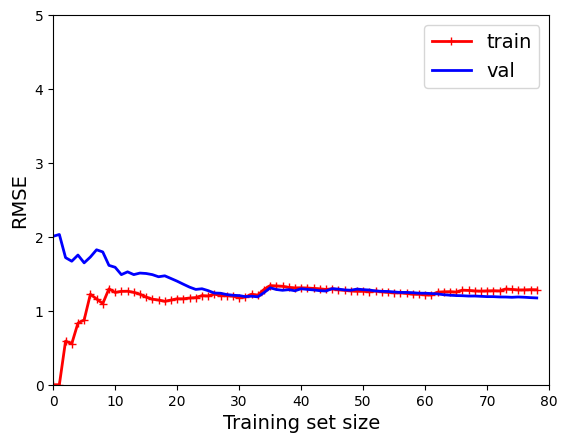

In [119]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

When the training set is small the errors is almost zero for training set and very high for the validation set. When the new instances are added the error is goes up until it reaches a plateu. The validation error is high when the the learning set is small. With bigger set the model learns better and the error is smaller until it reaches a plateu.

<b>These learning curves are typical of an underfitting model. Both curves have reacheda plateau; they are close and fairly high.</b>

Nowe let's look at the 10th degree polynomial model on the same data.

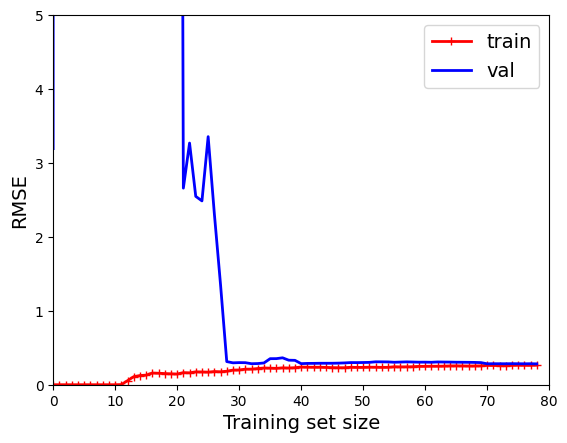

In [120]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

These learning curves look a bit like the previous ones but there are two very important differences:
* The error on the training data is much lower than with thge Linear Regression
* There is a gap between curves. This means that the model performs significantly better on the training data than on the validation data. That means that this model is overfitting the data. However if you used a much larger dataset the two curves would continue to get closer.

An  important  theoretical  result  of  statistics  and  Machine  Learning  is  the  fact  that  amodel’s  generalization  error  can  be  expressed  as  the  sum  of  three  very  different errors:
* <b>Bias</b> - This part of the generalization error is due to wrong assumptions, such as assum‐ing that the data is linear when it is actually quadratic. A high-bias model is mostlikely to underfit the training data. 
* <b>Variance</b> - This  part  is  due  to  the  model’s  excessive  sensitivity  to  small  variations  in  thetraining data. A model with many degrees of freedom (such as a high-degree pol‐ynomial  model)  is  likely  to  have  high  variance,  and  thus  to  overfit  the  trainingdata.
* <b>Irreducible error</b> - This  part  is  due  to  the  noisiness  of  the  data  itself.  The  only  way  to  reduce  thispart of the error is to clean up the data (e.g., fix the data sources, such as brokensensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias.Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a tradeoff.

### Regularized Linear Models
<b>Tip:</b> It is important to scale the data for the most of regularized models before performing them.

#### Ridge regression
Ridge regression is a regularized (contrainted - fewer degrees of freedom) version of Linear Regression. The regularization term should only be added to the cost funstion during trainnig. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

In the ridge regression the regularization term is <b>alpha \* sum(theta^2)</b> added to the cost funtion. The sum starts from n=1 not n=0 - the bias term theta_0 is not regularized

So the cost function is <b>J(theta) = MSE(theta) + alpha*sum(theta^2) </b>

* alpha - hyperparamters controlling how much you wnt to regularize model
* theta - features


In [122]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [123]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [124]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

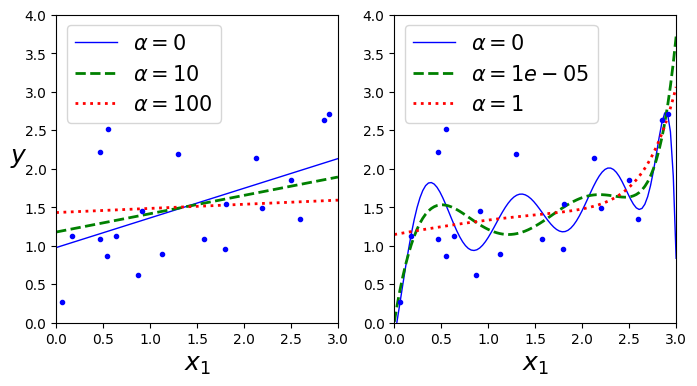

In [134]:
from sklearn.preprocessing import StandardScaler

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ('b-', 'g--', 'r:')):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()

        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regular_reg", model)
            ])

        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()


Increasing alpha leads to flatter predictions (less extreme, more reasonable). This reduces the model's variance but increases its bias